In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

e:\unist\time-series\currency-exchange-forecast\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:
data = pd.read_csv("preprocessed-data/krwvnd.csv")
data.rename(columns={'Date': 'ds', 'Close':'y'}, inplace=True)
data["ds"] = pd.to_datetime(data["ds"])
data

,ds,y
0,2004-01-02,12.661377
1,2004-01-05,12.597076
2,2004-01-06,12.724485
3,2004-01-07,12.622449
4,2004-01-08,12.665998
...,...,...
5974,2023-10-27,18.123903
5975,2023-10-28,18.123247
5976,2023-10-29,18.123247
5977,2023-10-30,18.211071


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
data[['y']] = scaler.fit_transform(data[['y']])
data

,ds,y
0,2004-01-02,0.174987
1,2004-01-05,0.169033
2,2004-01-06,0.180832
3,2004-01-07,0.171383
4,2004-01-08,0.175415
...,...,...
5974,2023-10-27,0.680851
5975,2023-10-28,0.680791
5976,2023-10-29,0.680791
5977,2023-10-30,0.688924


In [5]:
# context_length = 96
# for i in range(context_length):
#     data[f'y_lag_{i}'] = data['y'].shift(i)
# data = data.dropna()

In [6]:
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train, test = data.iloc[0:train_size], data.iloc[train_size:len(data)]
print(len(train), len(test))

4783 1196


In [7]:
param_grid = {
    'seasonality_mode': ['additive', 'multiplicative'], #['additive', 'multiplicative']
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5], #[0.01, 0.1, 0.5]
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0], #[1, 10, 30]
}


In [8]:
best_params = {}
best_score = float('inf')

In [9]:
for mode in param_grid['seasonality_mode']:
    for cps in param_grid['changepoint_prior_scale']:
        for sps in param_grid['seasonality_prior_scale']:
            # Create a model with the current hyperparameters
            model = Prophet(seasonality_mode=mode, 
                            changepoint_prior_scale=cps, 
                            seasonality_prior_scale=sps, 
                            )
            model.fit(train)

            # Evaluate the model using Mean Squared Error (MSE) and cross validation
            # df_cv = cross_validation(model, initial='4783 days', period='30 days', horizon='1 days')
            # score = mean_squared_error(df_cv['y'], df_cv['yhat'])
            future = model.make_future_dataframe(periods=train_size)
            forecast = model.predict(future)
            y_true = test['y'].values
            y_pred = forecast['yhat'].values[-len(test):]
            score = mean_squared_error(y_true, y_pred)
            print(mode, cps, sps, score)

            # Update best parameters
            if score < best_score:
                best_score = score
                best_params = {
                    'seasonality_mode': mode,
                    'changepoint_prior_scale': cps,
                    'seasonality_prior_scale': sps
                }

23:16:24 - cmdstanpy - INFO - Chain [1] start processing
23:16:24 - cmdstanpy - INFO - Chain [1] done processing


additive 0.001 0.01 0.347493666727049


23:16:26 - cmdstanpy - INFO - Chain [1] start processing
23:16:26 - cmdstanpy - INFO - Chain [1] done processing


additive 0.001 0.1 0.35347898684778073


23:16:27 - cmdstanpy - INFO - Chain [1] start processing
23:16:28 - cmdstanpy - INFO - Chain [1] done processing


additive 0.001 1.0 0.3470569873945604


23:16:29 - cmdstanpy - INFO - Chain [1] start processing
23:16:29 - cmdstanpy - INFO - Chain [1] done processing


additive 0.001 10.0 0.34872903651337506


23:16:31 - cmdstanpy - INFO - Chain [1] start processing
23:16:31 - cmdstanpy - INFO - Chain [1] done processing


additive 0.01 0.01 0.023430072791355852


23:16:33 - cmdstanpy - INFO - Chain [1] start processing
23:16:33 - cmdstanpy - INFO - Chain [1] done processing


additive 0.01 0.1 0.015761532645786114


23:16:35 - cmdstanpy - INFO - Chain [1] start processing
23:16:35 - cmdstanpy - INFO - Chain [1] done processing


additive 0.01 1.0 0.014670771325763136


23:16:37 - cmdstanpy - INFO - Chain [1] start processing
23:16:37 - cmdstanpy - INFO - Chain [1] done processing


additive 0.01 10.0 0.0216394377257964


23:16:39 - cmdstanpy - INFO - Chain [1] start processing
23:16:40 - cmdstanpy - INFO - Chain [1] done processing


additive 0.1 0.01 0.2120349095935444


23:16:42 - cmdstanpy - INFO - Chain [1] start processing
23:16:43 - cmdstanpy - INFO - Chain [1] done processing


additive 0.1 0.1 0.20863723501727183


23:16:45 - cmdstanpy - INFO - Chain [1] start processing
23:16:46 - cmdstanpy - INFO - Chain [1] done processing


additive 0.1 1.0 0.20868641032214935


23:16:48 - cmdstanpy - INFO - Chain [1] start processing
23:16:49 - cmdstanpy - INFO - Chain [1] done processing


additive 0.1 10.0 0.2124140484433874


23:16:51 - cmdstanpy - INFO - Chain [1] start processing
23:16:52 - cmdstanpy - INFO - Chain [1] done processing


additive 0.5 0.01 0.25486160815343223


23:16:54 - cmdstanpy - INFO - Chain [1] start processing
23:16:56 - cmdstanpy - INFO - Chain [1] done processing


additive 0.5 0.1 0.2583258952869238


23:16:57 - cmdstanpy - INFO - Chain [1] start processing
23:16:59 - cmdstanpy - INFO - Chain [1] done processing


additive 0.5 1.0 0.25673739834736087


23:17:00 - cmdstanpy - INFO - Chain [1] start processing
23:17:02 - cmdstanpy - INFO - Chain [1] done processing


additive 0.5 10.0 0.25658839652935883


23:17:04 - cmdstanpy - INFO - Chain [1] start processing


In [ ]:
best_params

{'seasonality_mode': 'additive',
 'changepoint_prior_scale': 0.01,
 'seasonality_prior_scale': 10.0}

In [ ]:
model = Prophet(**best_params)
# for i in range(context_length):
#     model.add_regressor(f'y_lag_{i}')
model.fit(train)

23:04:15 - cmdstanpy - INFO - Chain [1] start processing
23:04:16 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# future = data.copy().drop('y', axis=1)
# future.reset_index(drop=True, inplace=True)
future = model.make_future_dataframe(periods=test_size+30)
forecast = model.predict(future)
forecast = forecast[['ds', 'yhat']]
forecast

,ds,yhat
0,2004-01-02,0.049148
1,2004-01-05,0.049760
2,2004-01-06,0.050542
3,2004-01-07,0.050984
4,2004-01-08,0.051044
...,...,...
5979,2023-11-26,0.892850
5980,2023-11-27,0.893547
5981,2023-11-28,0.894188
5982,2023-11-29,0.894525


In [ ]:
forecast[['yhat']] = scaler.inverse_transform(forecast[['yhat']])
data[['y']] = scaler.inverse_transform(data[['y']])


In [ ]:
# y_true = test['y'].values
# y_pred = forecast['yhat'].values[-len(test):]

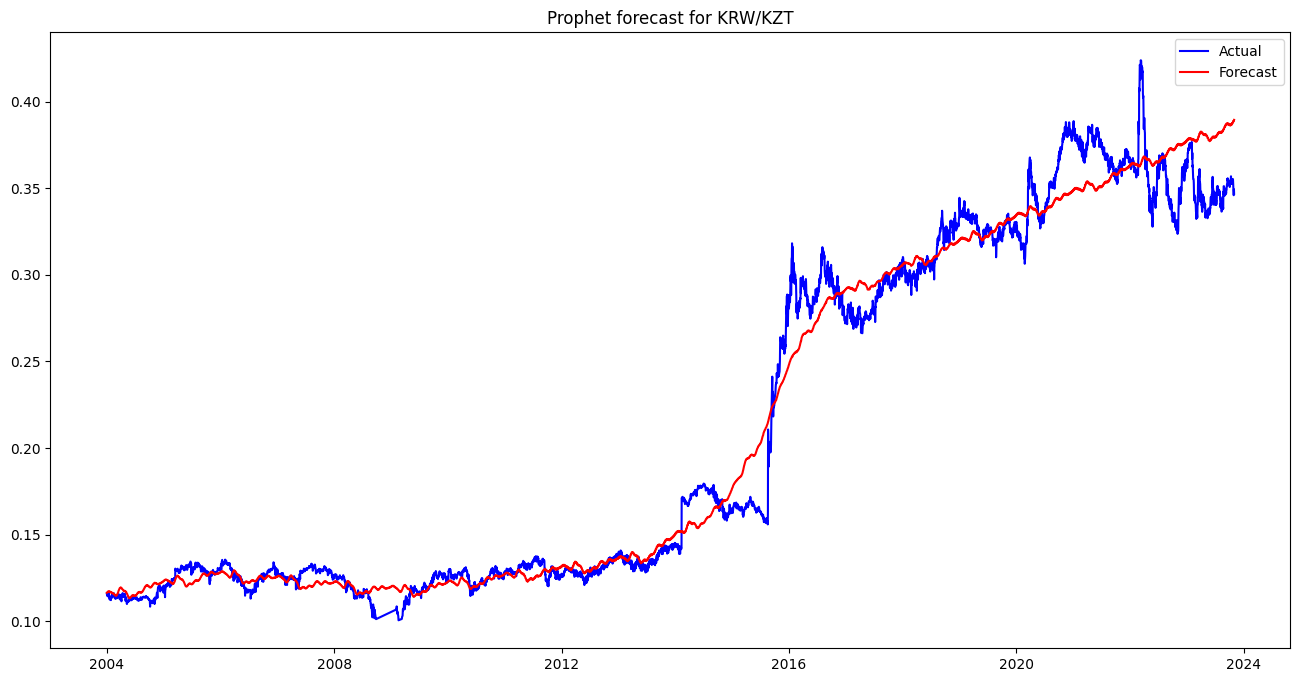

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data['ds'], data['y'], label='Actual', color='blue')
plt.title(f"Prophet forecast for KRW/VND")
plt.plot(forecast['ds'][:len(data)], forecast['yhat'][:len(data)], label='Forecast', color='red')
plt.legend()
plt.savefig('./plots/prophet_krwvnd_train_val')
plt.show()

In [ ]:
test_df = pd.read_csv("./krwvnd-test.csv")
test_df["Close"] = test_df.Close.map(lambda x: np.float32(x.replace(",", ".")))
test_df["Date"] = test_df.Date.map(lambda x: pd.to_datetime(x, dayfirst=True).date())
test_df.rename(columns={'Date': 'ds', 'Close':'y'}, inplace=True)
test_df.head()

,ds,y
0,2023-11-01,0.348330
1,2023-11-02,0.349403
2,2023-11-03,0.352313
3,2023-11-04,0.352271
4,2023-11-05,0.352271


In [ ]:
forecast[-30:]

,ds,yhat
5954,2023-11-01,0.389739
5955,2023-11-02,0.389783
5956,2023-11-03,0.389702
5957,2023-11-04,0.389319
5958,2023-11-05,0.389562
5959,2023-11-06,0.389799
5960,2023-11-07,0.389999
5961,2023-11-08,0.390083
5962,2023-11-09,0.390039
5963,2023-11-10,0.389874


In [ ]:
testY = test_df.y.values
testPred = forecast[-30:].yhat.values
# testPred
# testPred = scaler.inverse_transform(testPred.reshape(-1, 1))
# testY = scaler.inverse_transform(testY.reshape(-1, 1))
testScore = mean_squared_error(testY, testPred)
testScore

0.001276509247241063

In [ ]:
testX = data['y'].values[-96:]

In [ ]:
denormalized_data = testX
num_lookback = 96
denormalized_data = denormalized_data[:num_lookback]

In [ ]:
denormalized_data

array([0.34835768, 0.34829774, 0.34835494, 0.3481757 , 0.34486678,
       0.34347802, 0.3428007 , 0.33903614, 0.3389194 , 0.33938754,
       0.3413872 , 0.33908686, 0.33927846, 0.33762828, 0.3365877 ,
       0.3365879 , 0.33696312, 0.33714962, 0.33762127, 0.34241486,
       0.34495428, 0.34486935, 0.33793828, 0.3379381 , 0.33895728,
       0.33824635, 0.34797326, 0.3462925 , 0.35123047, 0.35124132,
       0.35123047, 0.35029545, 0.35029328, 0.35010892, 0.34576336,
       0.3486311 , 0.34718627, 0.34862846, 0.34790233, 0.3463634 ,
       0.34748933, 0.34771538, 0.34748793, 0.34756935, 0.34712696,
       0.34931308, 0.34924504, 0.3503521 , 0.35082465, 0.35211912,
       0.35151026, 0.35152593, 0.35560095, 0.35453057, 0.35558462,
       0.35569817, 0.35450757, 0.35450774, 0.35450622, 0.35387444,
       0.35409632, 0.3545214 , 0.35187912, 0.35389045, 0.35396388,
       0.35388783, 0.35233793, 0.3507878 , 0.35312447, 0.35427895,
       0.35348454, 0.3534703 , 0.35348323, 0.35477445, 0.35563

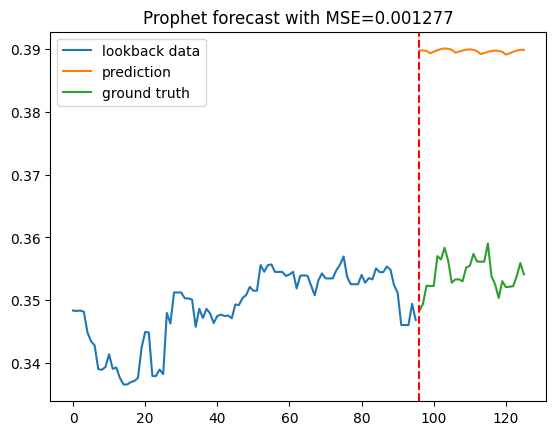

In [ ]:
testScore = mean_squared_error(testY, testPred)

plt.plot(denormalized_data, label="lookback data")
plt.plot(np.concatenate([np.ones(num_lookback) * np.nan, testPred.reshape(-1)]), label='prediction')
plt.plot(np.concatenate([np.ones(num_lookback) * np.nan, testY.reshape(-1)]), label='ground truth')
plt.axvline(x=denormalized_data.shape[0], c='r', linestyle='--')
plt.title(f"Prophet forecast with MSE={testScore:.6f}")
plt.legend()
plt.savefig('./plots/lstm_krwvnd_test')
plt.show()

Best params for KRW/VND: {'seasonality_mode': 'additive',
 'changepoint_prior_scale': 0.01,
 'seasonality_prior_scale': 0.01}

Best params for KRW/KZT: {'seasonality_mode': 'additive',
 'changepoint_prior_scale': 0.01,
 'seasonality_prior_scale': 1.0}